# Marketing Campaign Performance Insights

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Load the Dataset

In [20]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv')

## 2) Descriptive Analysis
### Basic Structure:

In [3]:
dataset.head(3)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023


In [4]:
dataset.tail(3)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
22026,22027,TechCorp,Influencer,Women 25-34,30 days,Facebook,4.319947,7154,-9.21,Seattle,German,1299,31078,9,Outdoor Adventurers,31-12-2023
22027,22028,Data Tech Solutions,Search,Men 18-24,45 days,Facebook,3.959947,6471,95.18,Dallas,Mandarin,2526,66129,8,Health & Wellness,31-12-2023
22028,22029,NexGen Systems,Search,Men 18-24,30 days,Instagram,5.859947,6089,49.12,Miami,French,1816,31753,9,Outdoor Adventurers,31-12-2023


In [34]:
dataset.shape

(22029, 16)

In [23]:
dataset.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [55]:
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Campaign_ID       22029 non-null  int64         
 1   Company           22029 non-null  object        
 2   Campaign_Type     22029 non-null  object        
 3   Target_Audience   22029 non-null  object        
 4   Duration          22029 non-null  object        
 5   Channel_Used      22029 non-null  object        
 6   Conversion_Rate   22029 non-null  float64       
 7   Acquisition_Cost  22029 non-null  int64         
 8   ROI               22029 non-null  float64       
 9   Location          22029 non-null  object        
 10  Language          22029 non-null  object        
 11  Clicks            22029 non-null  int64         
 12  Impressions       22029 non-null  int64         
 13  Engagement_Score  22029 non-null  int64         
 14  Customer_Segment  2202

In [30]:
dataset.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


### Data Exploration:

In [46]:
dataset["Campaign_ID"].nunique()

22029

In [41]:
dataset["Location"].unique()

array(['Houston', 'Washington, D.C.', 'Miami', 'Seattle', 'Chicago',
       'Los Angeles', 'Atlanta', 'Dallas', 'New York', 'San Francisco'],
      dtype=object)

In [44]:
dataset["Customer_Segment"].unique()

array(['Tech Enthusiasts', 'Foodies', 'Fashionistas',
       'Outdoor Adventurers', 'Health & Wellness'], dtype=object)

In [47]:
dataset['Campaign_Type'].value_counts()

Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64

In [49]:
dataset['Channel_Used'].value_counts()

Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64

## 3) Exploratory Data Analysis (EDA) and Visualization
### Campaign Performance:

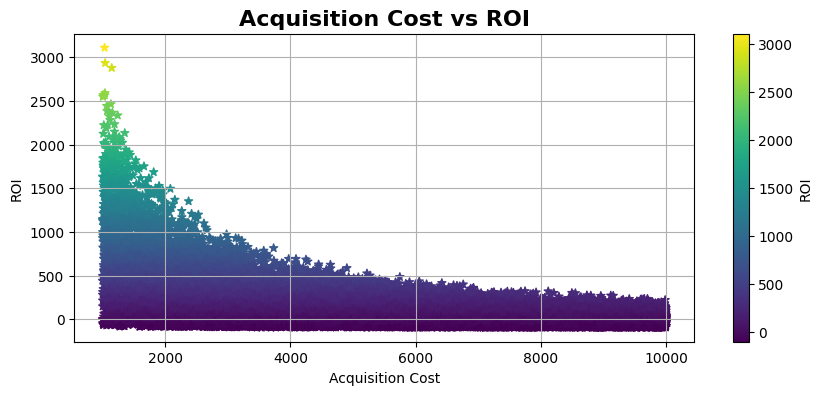

In [7]:
plt.figure(figsize=(10, 4))
plt.scatter(dataset['Acquisition_Cost'], dataset['ROI'], c=dataset['ROI'], cmap='viridis', marker='*')
plt.title('Acquisition Cost vs ROI', fontsize=16,fontweight="bold")
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')
plt.colorbar(label='ROI')
plt.grid(True)
plt.show()

In [27]:
average_Conversion_Rate =dataset.groupby(['Channel_Used','Campaign_Type'])['Conversion_Rate'].mean().reset_index()

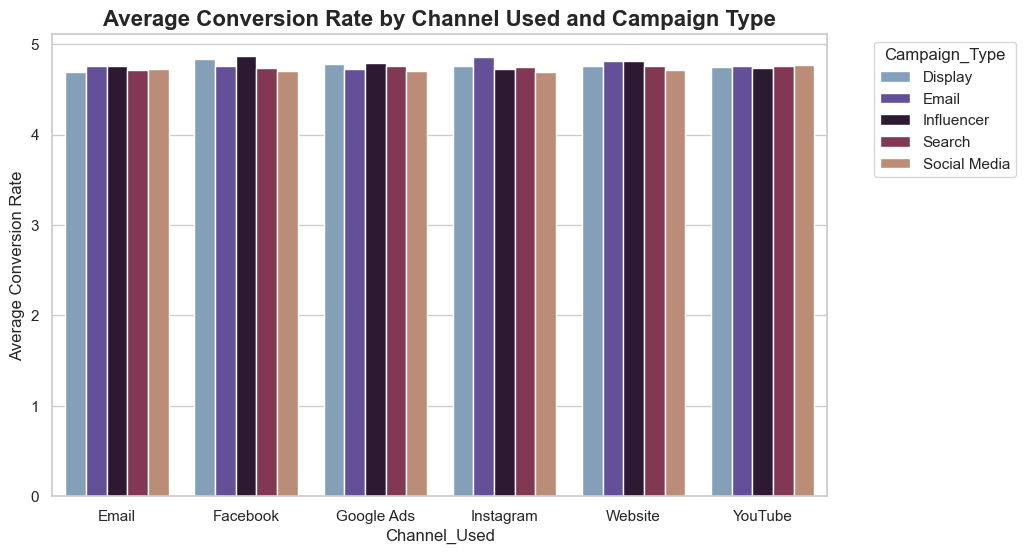

In [28]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
plt.title('Average Conversion Rate by Channel Used and Campaign Type', fontsize=16,fontweight="bold")
sns.barplot(data=average_Conversion_Rate,x='Channel_Used',y='Conversion_Rate',hue="Campaign_Type",palette="twilight")
plt.ylabel("Average Conversion Rate")
plt.legend(title='Campaign_Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

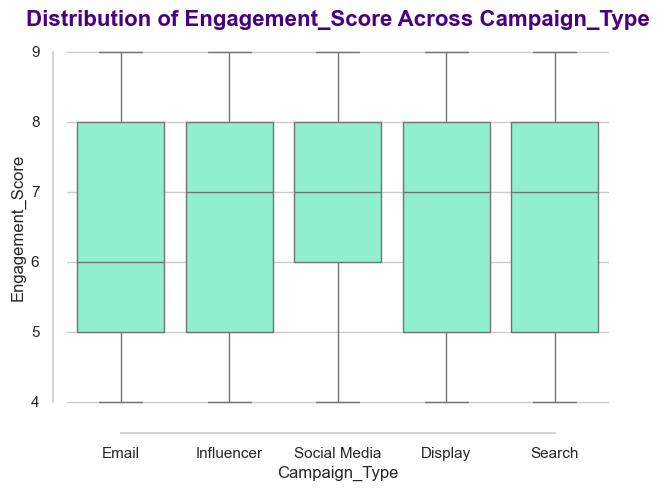

In [91]:
plt.figure(figsize=(7, 5)) 
sns.boxplot(x='Campaign_Type', y='Engagement_Score', data=dataset,color='aquamarine')
plt.title('Distribution of Engagement_Score Across Campaign_Type', fontsize=16,color='indigo',fontweight="bold")
sns.despine(offset=10, trim=True)
plt.show()

In [21]:
average_roi = dataset.groupby('Company')['ROI'].mean().reset_index()

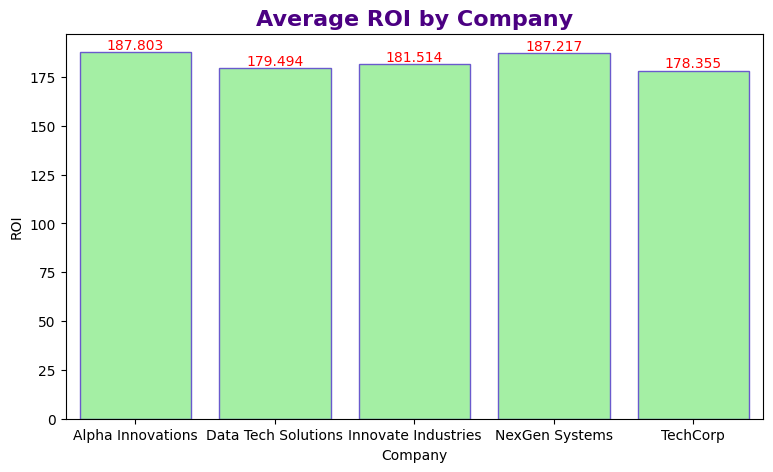

In [28]:
plt.figure(figsize=(9,5))
avg =sns.barplot(data=average_roi,x="Company",y="ROI",edgecolor="slateblue",color='palegreen')
plt.title('Average ROI by Company', fontsize=16,color='indigo',fontweight="bold")
avg.bar_label(avg.containers[0],color="red")
plt.show()

In [32]:
df = dataset[['Engagement_Score', 'Conversion_Rate']]
corr_matrix = df.corr()

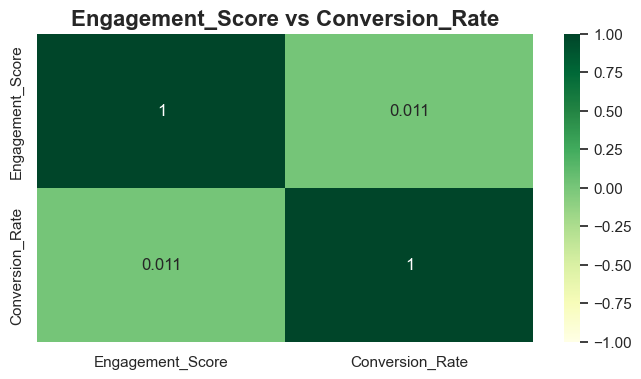

In [33]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='YlGn', vmin=-1, vmax=1)
plt.title('Engagement_Score vs Conversion_Rate',fontsize=16,fontweight="bold")
plt.show()

### Customer Segmentation:

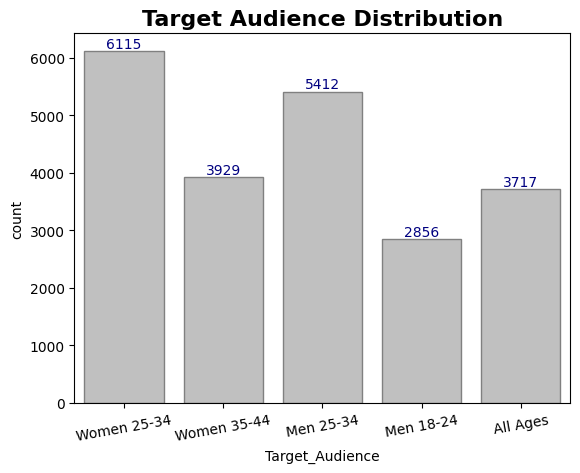

In [23]:
count=sns.countplot(x='Target_Audience', data=dataset,color="silver",edgecolor='gray')
count.bar_label(count.containers[0],color="navy")
plt.title('Target Audience Distribution',fontsize=16,fontweight="bold")
plt.xticks(rotation=(10))
plt.show()

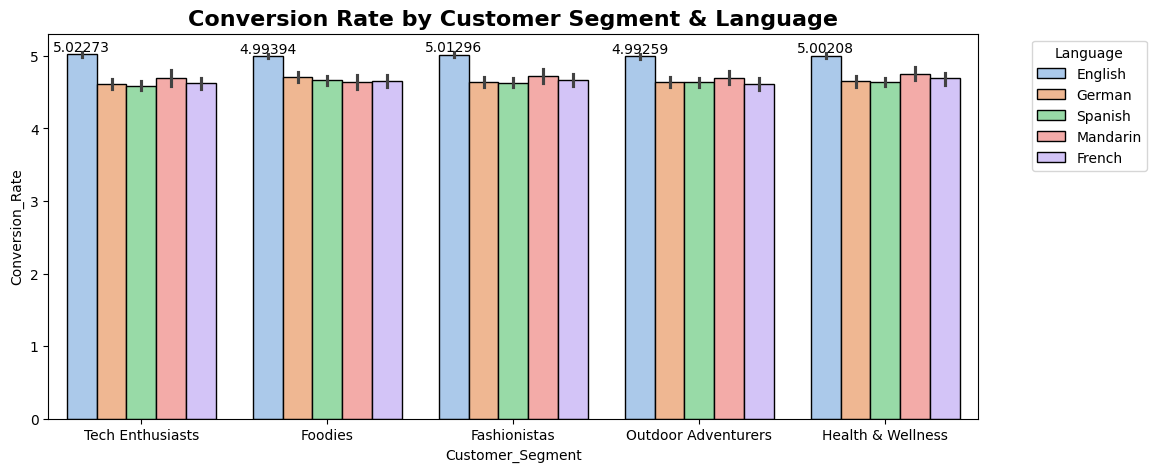

In [24]:
plt.figure(figsize=(12, 5))
Highest_C_R = sns.barplot(data=dataset, x='Customer_Segment',y= 'Conversion_Rate', hue="Language",
                          palette="pastel",edgecolor='black')
plt.title('Conversion Rate by Customer Segment & Language',fontsize=16,fontweight="bold")
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
Highest_C_R.bar_label(Highest_C_R.containers[0])
plt.show()

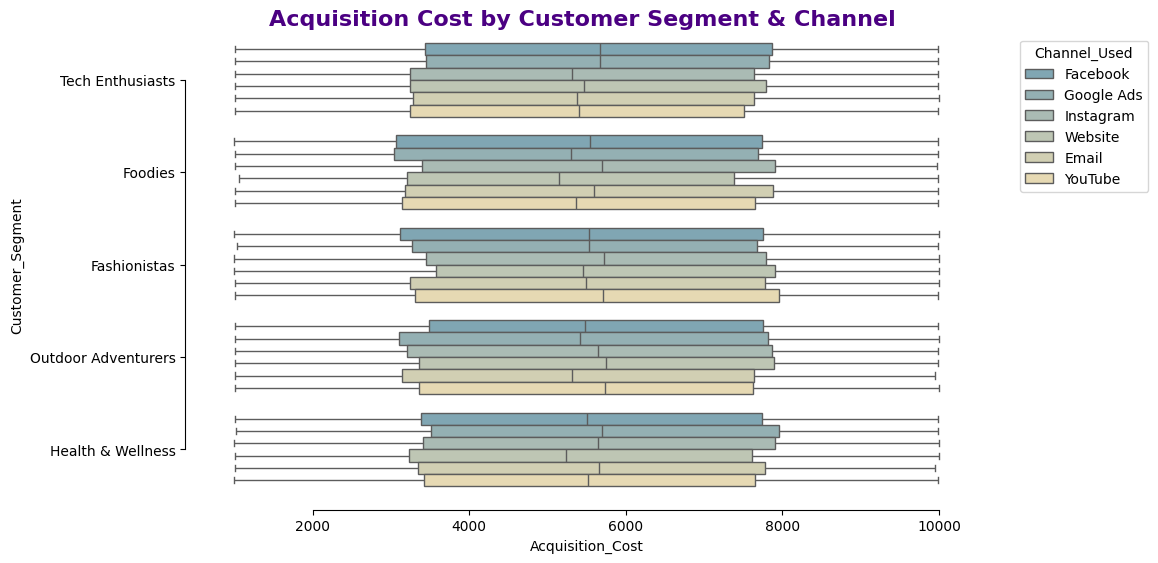

In [25]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='Acquisition_Cost', y='Customer_Segment',hue="Channel_Used" ,data=dataset,palette='blend:#7AB,#EDA')
plt.title('Acquisition Cost by Customer Segment & Channel ', fontsize=16,color='indigo',fontweight="bold")
plt.legend(title='Channel_Used', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(offset=10, trim=True)
plt.show()

In [26]:
ave_Con_Rate = dataset.groupby('Language')['Conversion_Rate'].mean().reset_index()

<Figure size 1000x500 with 0 Axes>

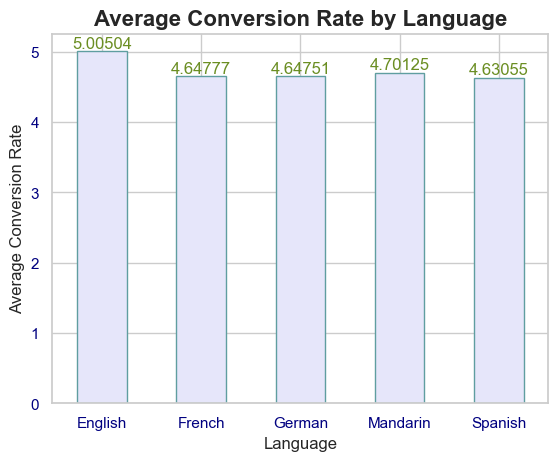

In [71]:
plt.figure(figsize=(10,5))
bar1=ave_Con_Rate.plot(x='Language',y='Conversion_Rate',kind='bar',legend=False,color="lavender",edgecolor='cadetblue')
plt.title("Average Conversion Rate by Language",fontsize=16,fontweight="bold")
plt.ylabel("Average Conversion Rate")
plt.xticks(rotation=0,color="navy")
plt.yticks(color="navy")
bar1.bar_label(bar1.containers[0],color="olivedrab")
plt.show()

### Channel Effectiveness:

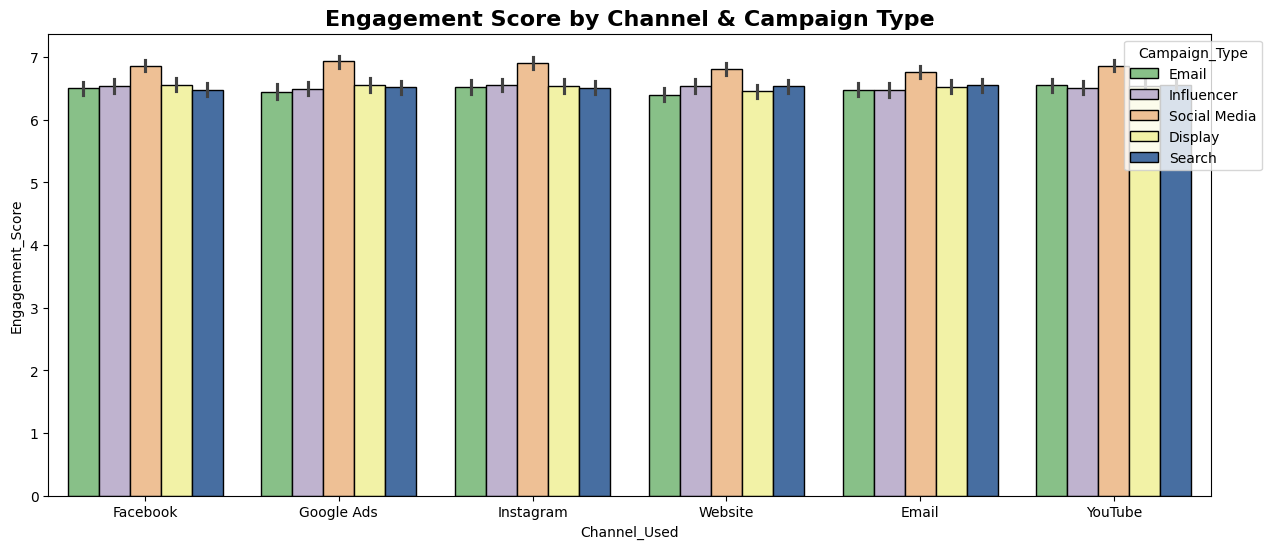

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(data=dataset,y='Engagement_Score',x='Channel_Used',hue="Campaign_Type",palette='Accent',edgecolor='black')
plt.title('Engagement Score by Channel & Campaign Type',fontsize=16,fontweight="bold")
plt.legend(title='Campaign_Type', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

In [11]:
Total_roi=dataset.groupby("Channel_Used")["ROI"].sum().reset_index()

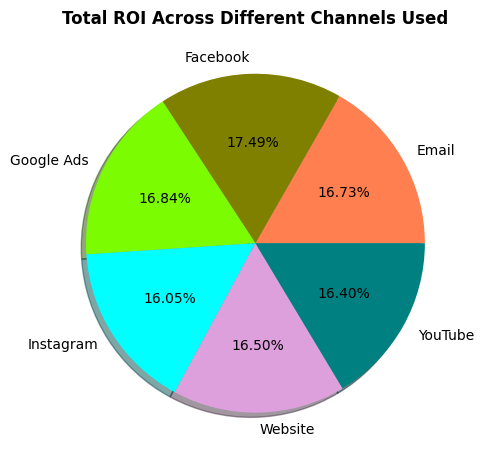

In [13]:
plt.figure(figsize=(5, 5))
plt.pie(x=Total_roi["ROI"],labels=Total_roi["Channel_Used"],autopct='%1.2f%%',shadow=True,
        colors=['coral', 'olive', 'lawngreen', 'cyan','plum','teal'])
plt.title("Total ROI Across Different Channels Used",fontweight="bold")
plt.tight_layout()
plt.show()

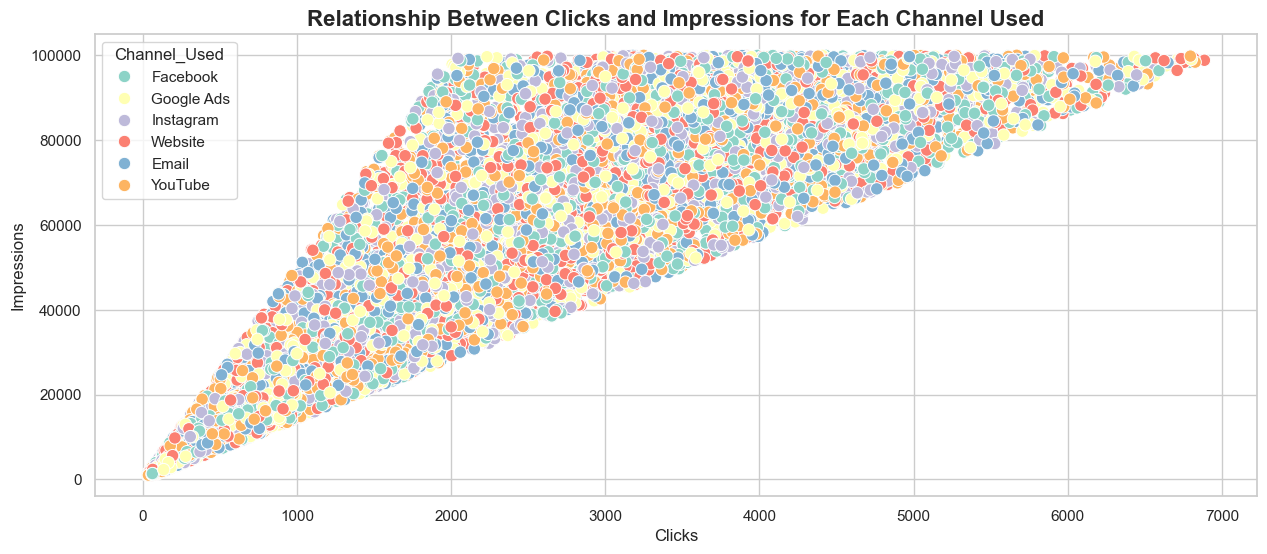

In [42]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=dataset,x="Clicks",y="Impressions",hue="Channel_Used",palette='Set3',s=80)
plt.title('Relationship Between Clicks and Impressions for Each Channel Used',fontsize=16,fontweight="bold")
plt.show()

### Time-Based Analysis:

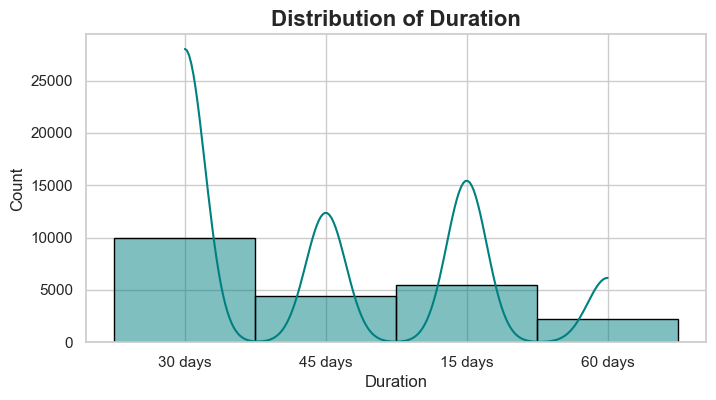

In [43]:
plt.figure(figsize=(8,4))
sns.histplot(dataset['Duration'],kde=True,bins=10,edgecolor='black',color="teal")
plt.title('Distribution of Duration',fontsize=16,fontweight="bold")
plt.show()

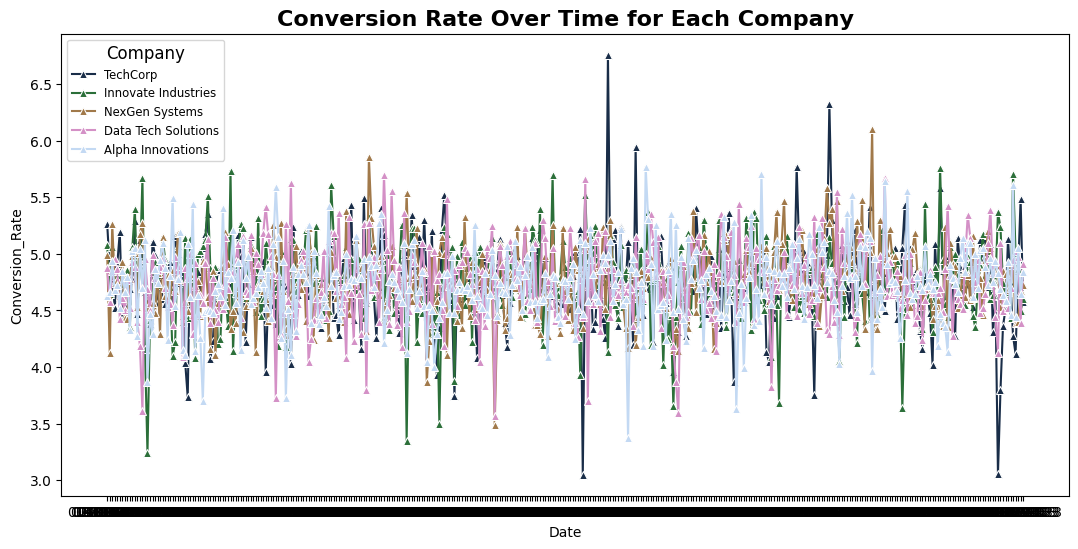

In [9]:
plt.figure(figsize=(13,6))
sns.lineplot(data=dataset,x="Date",y="Conversion_Rate",hue="Company",marker="^",palette="cubehelix",errorbar=None)
plt.legend(title='Company', fontsize='small', title_fontsize='large',loc='upper left')
plt.title('Conversion Rate Over Time for Each Company',fontsize=16,fontweight="bold")
plt.grid(False)
plt.show()

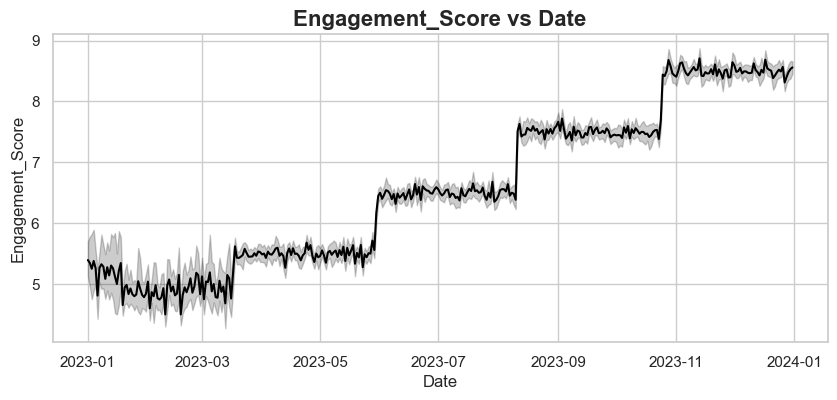

In [62]:
plt.figure(figsize=(10,4))
sns.lineplot(data=dataset,x="Date",y="Engagement_Score",color="black")
plt.title("Engagement_Score vs Date",fontsize=16,fontweight="bold")
plt.grid(True)
plt.show()

### Geographic Analysis:

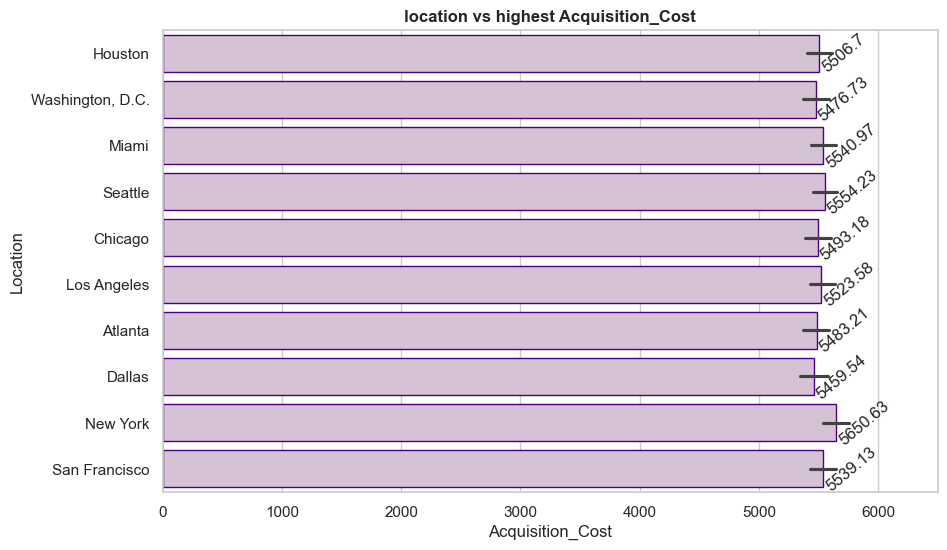

In [60]:
plt.figure(figsize=(10,6))
Location_bar=sns.barplot(data=dataset,x="Acquisition_Cost",y="Location",color="thistle",edgecolor='indigo')
Location_bar.bar_label(Location_bar.containers[0],rotation=(40))
plt.title("location vs highest Acquisition_Cost",fontweight="bold")
plt.xlim(0,6500)
plt.show()

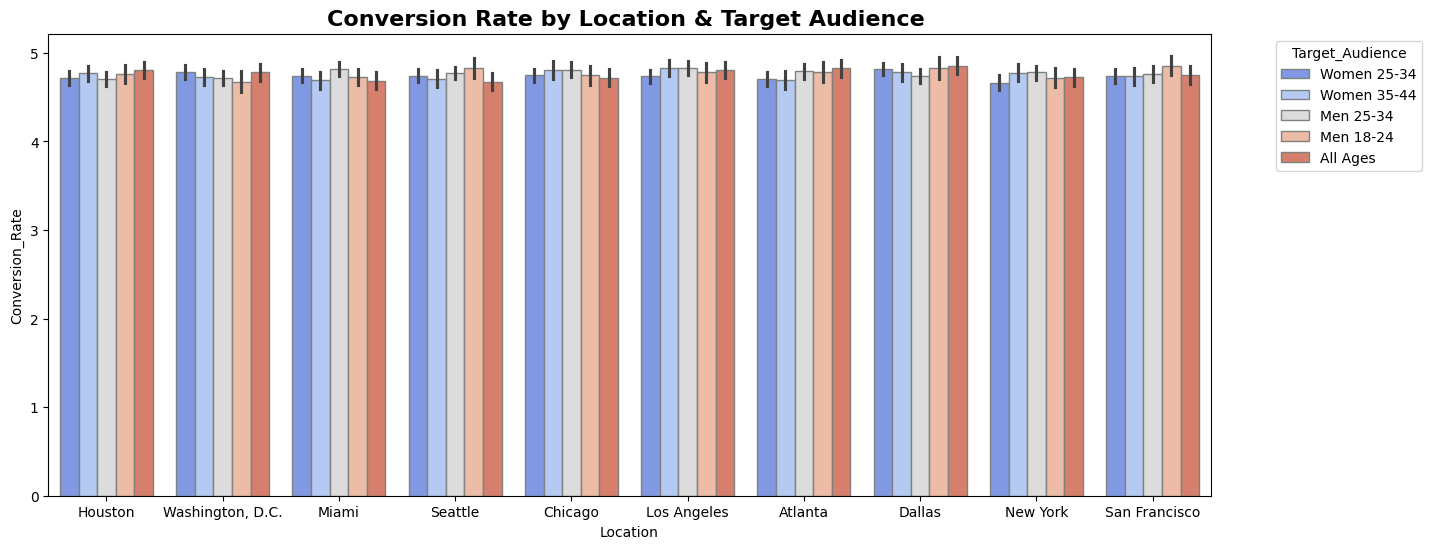

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(data=dataset,y="Conversion_Rate",x="Location",hue="Target_Audience",palette="coolwarm",edgecolor='grey')
plt.legend(title='Target_Audience', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Conversion Rate by Location & Target Audience ",fontsize=16,fontweight="bold")
plt.show()

In [48]:
proportion = dataset.groupby('Location')['ROI'].sum().reset_index()

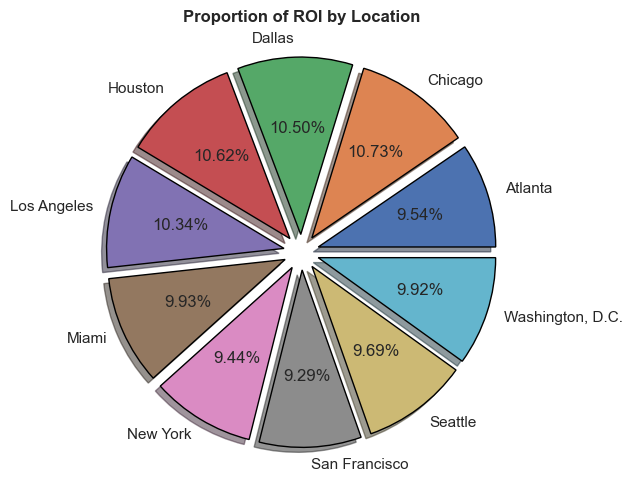

In [51]:
plt.figure(figsize=(8, 5))
plt.pie(x=proportion["ROI"],labels=proportion["Location"],autopct='%.2f%%',shadow=True,
        wedgeprops={'edgecolor': 'black'},explode=(.1,.1,.1,.1,.1,.1,.1,.1,.1,.1))
plt.title("Proportion of ROI by Location",fontweight="bold")
plt.tight_layout()
plt.show()